# Project: Wrangling and Analyze Data

## Table of contents 
<a name="table-of-contents"></a>

* [Data Gathering](#data-gathering)
* [Assessing Data](#assessing-data)
* [Cleaning](#cleaning)
* [Analyzing and Visualizing Data](#analyzing-and-visualizing-data)

## Data Gathering <a name="data-gathering"></a> 

Back to [Table of Contents](#table-of-contents)

In [1]:
# imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json

In [2]:
# import Twitter API key
import constants

In [3]:
# set max column display width to 260 characters so that we can read full tweet text
pd.options.display.max_colwidth = 260

1. Import the twitter_archive_enhanced.csv

In [4]:
df_ta = pd.read_csv('./source_data/twitter-archive-enhanced.csv')
df_ta.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use `requests` to download the tweet image predication (image_predictions.tsv)

In [5]:
if not os.path.exists('./source_data'):
    os.makedirs('./source_data/')

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

# confirm request successful
assert r.status_code == 200

# write r.content to output file
with open('./source_data/image_predictions.tsv', 'wb') as fp:
    fp.write(r.content)


In [6]:
# import downloaded file to a second df
df_ip = pd.read_csv('./source_data/image_predictions.tsv', delimiter='\t')
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# import the tweepy api library
import tweepy

# set up client object with authentication
client = tweepy.Client(
    bearer_token=constants.BEARER_TOKEN_TWITTER,
    wait_on_rate_limit=True
)


In [8]:
# check number of requests we'll be making
len(df_ta)

2356

In [9]:
# NOTE: ** THIS STEP TAKES 100+ MINS TO COMPLETE! **

# # create a path
# if not os.path.exists('./source_data'):
#     os.makedirs('./source_data/')
# # clear the file if it already exists
# if os.path.exists('./source_data/tweet_json.txt'):
#     os.remove('./source_data/tweet_json.txt')
# 
# # loop through tweet_ids in the df_ta file
# additional_data = []
# additional_data_errors = []
# for tweet_id in df_ta['tweet_id']:
#     # hit the twitter api and gather retweet count, like count 
#     r = client.get_tweet(tweet_id, tweet_fields='public_metrics')
#     print(tweet_id)
#     # form the metrics into a dictionary
#     if r.errors == []:
#         public_metrics = {
#             'tweet_id': tweet_id,
#             'retweet_count': r.data.public_metrics['retweet_count'],
#             'reply_count': r.data.public_metrics['reply_count'],
#             'like_count': r.data.public_metrics['like_count'],
#             'quote_count': r.data.public_metrics['quote_count'],
#         }
#         # add the data to the metrics
#         additional_data.append(public_metrics)
#     else:
#         print(tweet_id, r.errors)
#         additional_data_errors.append(r.errors)
# 
# # open the file, write the result
# with open('./source_data/tweet_json.txt', 'a') as fp:
#     # write the list of dicts the file
#     json.dump(additional_data, fp)


In [10]:
# # check how many tweets could not be retrieved
# len(additional_data_errors)

In [11]:
# read the tweet_json into a dataframe
df_count_data = pd.read_json('./source_data/tweet_json.txt')

In [12]:
df_count_data

,tweet_id,retweet_count,reply_count,like_count,quote_count
0,892420643555336193,6982,139,33729,219
1,892177421306343426,5284,170,29261,274
2,891815181378084864,3469,110,21996,145
3,891689557279858688,7197,142,36819,286
4,891327558926688256,7731,193,35199,296
...,...,...,...,...,...
2322,666049248165822465,36,9,88,0
2323,666044226329800704,115,1,246,2
2324,666033412701032449,36,1,100,0
2325,666029285002620928,39,0,112,0


## Assessing Data 
<a name="assessing-data"></a> 

Back to [Table of Contents](#table-of-contents)

### Twitter archive

Visual assessment:

In [13]:
df_ta.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

Initial notes:
* Do all of the in_reply_to_ and retweeted_ columns imply that the tweet is a retweet?
* Is timestamp encoded as datetime?
* is 'source' column useful?  It is formatted as an html tag

Programmatic Assessment:

In [14]:
# check a subset of data with in_reply_to_ and retweeted_ columns populated
df_ta[df_ta['retweeted_status_timestamp'].notna()][['text', 'expanded_urls']].sample(5)

,text,expanded_urls
634,RT @dog_rates: When she says you're a good boy and you know you're a good boy because you're a good boy. 13/10 https://t.co/O5IUmRHRIh,"https://twitter.com/dog_rates/status/791672322847637504/photo/1,https://twitter.com/dog_rates/status/791672322847637504/photo/1"
596,RT @dog_rates: This is Stubert. He just arrived. 10/10 https://t.co/HVGs5aAKAn,"https://twitter.com/dog_rates/status/712809025985978368/photo/1,https://twitter.com/dog_rates/status/712809025985978368/photo/1"
453,RT @dog_rates: This is Chelsea. She forgot how to dog. 11/10 get it together pupper https://t.co/nBJ5RE4yHb,"https://twitter.com/dog_rates/status/773547596996571136/photo/1,https://twitter.com/dog_rates/status/773547596996571136/photo/1"
566,RT @dog_rates: Everybody drop what you're doing and look at this dog. 13/10 must be super h*ckin rare https://t.co/I1bJUzUEW5,"https://twitter.com/dog_rates/status/779056095788752897/photo/1,https://twitter.com/dog_rates/status/779056095788752897/photo/1,https://twitter.com/dog_rates/status/779056095788752897/photo/1,https://twitter.com/dog_rates/status/779056095788752897/photo/1"
446,RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,..."


**Observation:** Anything with the retweeted_status_ stamp appears to be a retweet, not an original 

In [15]:
df_ta[df_ta['in_reply_to_status_id'].notna()].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1005,747651430853525504,7.476487e+17,4.196984e+09,2016-06-28 04:42:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Other pupper asked not to have his identity shared. Probably just embarrassed about the headbutt. Also 12/10 it'll be ok mystery pup,NaN,NaN,NaN,NaN,12,10,None,None,None,pupper,None
1819,676590572941893632,6.765883e+17,4.196984e+09,2015-12-15 02:32:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After some outrage from the crowd. Bubbles is being upgraded to a 7/10. That's as high as I'm going. Thank you,NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
1339,704871453724954624,6.671522e+17,4.196984e+09,2016-03-02 03:30:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I found a forest Pipsy. 12/10 https://t.co/mIQ1KoVsmU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704871453724954624/photo/1,12,10,None,None,None,None,None
1905,674606911342424069,6.744689e+17,4.196984e+09,2015-12-09 15:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The 13/10 also takes into account this impeccable yard. Louis is great but the future dad in me can't ignore that luscious green grass,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None


**Observation:** Anything with a non-null in_reply_to_ seems to be a reply, not an original rating.  Most of these don't have appear to have a URL or dog name

In [16]:
# completeness - check number of rows
df_ta.shape

(2356, 17)

In [17]:
# completeness - check for NaN
df_ta.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
df_ta[df_ta['expanded_urls'].isna()].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,NaN,NaN,NaN,4,20,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
1474,693644216740769793,6.936422e+17,4.196984e+09,2016-01-31 03:57:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",BREAKING PUPDATE: I've just been notified that (if in U.S.) this dog appears to be operating the vehicle. Upgraded to 10/10. Skilled af,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


Observations:
* Only <100 of the in_reply_to_ columns are non-null
* ~150 of the retweeted_status_id columns are non-null
* 59 expanded urls are null - but these seem to be only replies

In [19]:
# completeness - check for duplicates
df_ta['tweet_id'].duplicated().sum()

0

In [20]:
# it looks like some dog names are None - confirm this
df_ta['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [21]:
# check if these names are truly unknown or if this was an error reading the tweet text
df_ta[df_ta['name']=='None']['text'].sample(10)

1349                                                                      This sneezy pupper is just adorable af. 12/10 (vid by @gwilks1) https://t.co/h5aI0Tim4j
1515                                                             We've got a doggy down. Requesting backup. 12/10 for both. Please enjoy  https://t.co/pmarb2dG0e
395                Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1
188                                                                        @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
869                  Guys.. we only rate dogs. Pls don't send any more pics of the Loch Ness Monster. Only send in dogs. Thank you. 11/10 https://t.co/obH5vMbm1j
25      This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
1568                        

In [22]:
# check if these names are truly unknown or if this was an error reading the tweet text
df_ta[df_ta['name']=='a']['text'].sample(10)

2191    This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5
2125       This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj
1361     This is a Butternut Cumberfloof. It's not windy they just look like that. 11/10 back at it again with the red socks https://t.co/hMjzhdUHaW
2264                          This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe
1382                                        "Pupper is a present to world. Here is a bow for pupper." 12/10 precious as hell https://t.co/ItSsE92gCW
2153     This is a brave dog. Excellent free climber. Trying to get closer to God. Not very loyal though. Doesn't bark. 5/10 https://t.co/ODnILTr4QM
649                 Here is a perfect example of someone who has their priorities in order. 13/10 for both

In [23]:
# check if these names are truly unknown or if this was an error reading the tweet text
df_ta[df_ta['name']=='the']['text']

1527                                   Stop sending in lobsters. This is the final warning. We only rate dogs. Thank you... 9/10 https://t.co/B9ZXXKJYNx
1603        This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn
1797                                                    This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb
1815                                                          This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF
2037    This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU
2212              Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3
2345                                         This is the happiest dog you will eve

**Observations:** 
* Some dog names are 'None', 'a' and 'the'
* The 'None' names seem correct - the dogs do not have a name
* The 'a' names sometimes contain a name (generally after the word 'named')
* The 'the' names should all be 'None' 

In [24]:
# check format of 'source' column
df_ta['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Observations:** This seems to actually be a categorical with the sources being: Twitter for iPhone; Vine; Twitter Web Client; TweetDeck

In [25]:
# check format of 'expanded_url' column
df_ta['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

**Observations:** Some URLs contain repeats of the same URL info

In [26]:
# Validity: check data types
df_ta.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

**Observations:** 
* timestamp is string but should be datetime
* doggo, floofer, pupper, puppo are encoded as strings but should be boolean (true / false)

In [27]:
# check if doggo, floofer, pupper and puppo are always mutually exclusive
((df_ta['doggo']=='doggo') & df_ta['floofer']=='floofer').sum() + \
((df_ta['doggo']=='doggo') & df_ta['pupper']=='pupper').sum() + \
((df_ta['doggo']=='doggo') & df_ta['puppo']=='puppo').sum() + \
((df_ta['floofer']=='floofer') & df_ta['pupper']=='pupper').sum() + \
((df_ta['floofer']=='floofer') & df_ta['puppo']=='puppo').sum() + \
((df_ta['pupper']=='pupper') & df_ta['puppo']=='puppo').sum()

0

**Observations:** 
* doggo, floofer, pupper and puppo are mutually exclusive => it would make most sense to encode them as a single column with a categorical

In [28]:
# check summary of numerical datatypes
df_ta.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [29]:
# check rating_denominator < 10
df_ta[df_ta['rating_denominator']<10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None


In [30]:
# check tweet numerator > 20
df_ta[(df_ta['rating_numerator']>20) & (df_ta['in_reply_to_status_id'].isna()) & (df_ta['retweeted_status_id'].isna()) ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1O

**Observations:** 
* tweet 810984652412424192 should be dropped - not a rating
* tweet 666287406224695296 rating should be corrected to 9/10 (incorrectly picked up as 1/2)
* rating_numerators over 20 look correct

In [31]:
df_ta['timestamp'].max(), df_ta['timestamp'].min()

('2017-08-01 16:23:56 +0000', '2015-11-15 22:32:08 +0000')

### Tweet Image Prediction

Visual assessment:

In [32]:
# visual assessment
df_ip.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**Observations:** Structurally, this is information about the dog, so should live with the other info about the dog in the tweet archive data

Programmatic Assessment:

In [33]:
# check for number of records
df_ip.shape

(2075, 12)

**Observations:** We have fewer records here than in the tweet archive

In [34]:
# check for NaN
df_ip.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
# check for duplicates
df_ip['tweet_id'].duplicated().sum()

0

In [36]:
# check datatypes
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
# check descriptive stats of numerical fields
df_ip.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Tweet count data

Visual assessment:

In [38]:
# visual inspection
df_count_data.head()

,tweet_id,retweet_count,reply_count,like_count,quote_count
0,892420643555336193,6982,139,33729,219
1,892177421306343426,5284,170,29261,274
2,891815181378084864,3469,110,21996,145
3,891689557279858688,7197,142,36819,286
4,891327558926688256,7731,193,35199,296


Programmatic Assessment:

In [39]:
# check for completeness
df_count_data.shape

(2327, 5)

**Observations:** We have some missing info - there were some missing id errors when fetching from Tweepy so it is likely from those

In [40]:
# completness - check for NaN
df_count_data.isna().sum()

tweet_id         0
retweet_count    0
reply_count      0
like_count       0
quote_count      0
dtype: int64

In [41]:
# check data types
df_count_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2327 non-null   int64
 1   retweet_count  2327 non-null   int64
 2   reply_count    2327 non-null   int64
 3   like_count     2327 non-null   int64
 4   quote_count    2327 non-null   int64
dtypes: int64(5)
memory usage: 91.0 KB


In [42]:
# check descriptive stats
df_count_data.describe()

,tweet_id,retweet_count,reply_count,like_count,quote_count
count,2.327000e+03,2327.000000,2327.000000,2327.000000,2327.000000
mean,7.417930e+17,2464.064890,42.185217,7034.757628,71.328320
std,6.820795e+16,4172.215212,70.788044,10930.969939,220.257932
min,6.660209e+17,1.000000,0.000000,0.000000,0.000000
25%,6.781394e+17,493.500000,9.000000,1222.000000,0.000000
50%,7.178418e+17,1148.000000,23.000000,3043.000000,1.000000
75%,7.986547e+17,2851.000000,48.000000,8574.000000,69.500000
max,8.924206e+17,70496.000000,1121.000000,144444.000000,4347.000000


In [43]:
df_count_data['tweet_id'].duplicated().sum()

0

## Quality issues
Completeness:

1. df_ta includes retweets and replies (indicated by non-null in_reply_to and retweeted_ columns) - **done**
2. Dog named 'a' should either be 'None' or their actual name - **done**
3. Dogs named 'the' should be 'None'
4. We do not have retweet / like data for all tweets - **done**
5. We do not have image predictions for all tweets - **not addressable: we don't have access to image classification engine**
6. Some expanded urls are missing - **done**

Validity:

7. Source is encoded as an HTML tag, but is actually a categorical - **done**
8. Expanded urls generally contain repeats of the same url separated by a comma - **done**
9. Timestamp is string but should be datetime - **done**
10. Doggo, floofer, etc are encoded as string - **done**

Accuracy:

11. tweet 810984652412424192 should be dropped - not a rating - **done**
12. tweet 666287406224695296 rating should be corrected to 9/10 (incorrectly picked up as 1/2) - **done**

## Tidiness issues
1. Doggo, floofer, pupper and puppo should be encoded as a single categorical column - **done**
2. The tweet archive contains information both about the dog (e.g. the dog’s name) and the tweet (e.g. the source of the tweet).  These should be separated into two separate tables **done**

## Cleaning 
<a name="cleaning"></a> 

Back to [Table of Contents](#table-of-contents)

### Copy data before cleaning

In [44]:
# copy dfs before cleaning
df_ta_clean = df_ta.copy(deep=True)
df_ip_clean = df_ip.copy(deep=True)
df_cd_clean = df_count_data.copy(deep=True)

### Issue: Tweet archive data contains retweets and replies

**Define:** 
* Filter any rows which have non-null values for retweeted_ or in_reply_to and remove from dataframe
* Remove the retweeted_ and reply_to_ columns

**Code:**

In [45]:
df_ta_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [46]:
# filter and remove any columns with non-null values for in_reply_to_
df_ta_clean = df_ta_clean[(df_ta_clean['in_reply_to_status_id'].isna()) & (df_ta_clean['in_reply_to_user_id'].isna())]

In [47]:
# filter and remove any columns with non-null values for in_reply_to_
df_ta_clean = df_ta_clean[(df_ta_clean['retweeted_status_id'].isna()) & (df_ta_clean['retweeted_status_user_id'].isna()) & (df_ta_clean['retweeted_status_timestamp'].isna())]

In [48]:
# confirm this worked
print(
    df_ta_clean['in_reply_to_status_id'].notna().sum(),
    df_ta_clean['in_reply_to_user_id'].notna().sum(),
    df_ta_clean['retweeted_status_id'].notna().sum(),
    df_ta_clean['retweeted_status_user_id'].notna().sum(),
    df_ta_clean['retweeted_status_timestamp'].notna().sum(),
)


0 0 0 0 0


**Test:**

In [49]:
# confirm this worked
df_ta_clean.shape

(2097, 17)

In [50]:
# drop the retweet and reply columns
df_ta_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [51]:
df_ta_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Issue: The doggo, floofer, pupper, puppo columns should be one column for a single categorical variable

Define
* Create a new column 'dog_type' and initialize the value to 'None' for every row
* Then populate dog_type when any of doggo, floofer, pupper, puppo columns are not 'None'
* Cast the new column to type categorical
* Delete the original 4 columns

**Code:**

In [52]:
df_ta_clean['dog_type'] = 'None'
df_ta_clean.loc[df_ta_clean['doggo']!='None', 'dog_type'] = 'doggo'
df_ta_clean.loc[df_ta_clean['floofer']!='None', 'dog_type'] = 'floofer'
df_ta_clean.loc[df_ta_clean['pupper']!='None', 'dog_type'] = 'pupper'
df_ta_clean.loc[df_ta_clean['puppo']!='None', 'dog_type'] = 'puppo'


In [53]:
# confirm this worked
df_ta_clean[df_ta_clean['dog_type']=='None'].sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
801,772581559778025472,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None,None
1313,706904523814649856,2016-03-07 18:09:06 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Ever seen a dog pet another dog? Both 13/10 truly an awe-inspiring scene. (Vid by @mdougherty20) https://t.co/3PoKf6cw7f,https://vine.co/v/iXQAm5Lrgrh,13,10,None,None,None,None,None,None
2124,670374371102445568,2015-11-27 22:51:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Daisy. She's rebellious. Full of teen angst. Thought her food should be evenly dispersed around the room. 12/10 https://t.co/8yzgYzP94K,https://twitter.com/dog_rates/status/670374371102445568/photo/1,12,10,Daisy,None,None,None,None,None
1843,675853064436391936,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,"https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1",88,80,None,None,None,None,None,None
514,811627233043480576,2016-12-21 17:39:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Augie. He's a savage. Doesn't give a h*ck about your garden. Still 10/10 would forgive then pet https://t.co/IU8S0n4oxn,https://twitter.com/dog_rates/status/811627233043480576/photo/1,10,10,Augie,None,None,None,None,None


In [54]:
# confirm this worked
df_ta_clean[df_ta_clean['dog_type']!='None'].sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
1348,704347321748819968,2016-02-29 16:47:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ralphson. He's very confused. Wondering why he's sitting on Santa's lap in February. 10/10 stay woke pupper https://t.co/INphk4ltkZ,https://twitter.com/dog_rates/status/704347321748819968/photo/1,10,10,Ralphson,None,None,pupper,None,pupper
1652,683481228088049664,2016-01-03 02:53:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Banjo. He's a Peppercorn Shoop Da Whoop. Nails look lethal. Skeptical of luminescent orb 11/10 stay woke pupper https://t.co/H7NZFumpKq,https://twitter.com/dog_rates/status/683481228088049664/photo/1,11,10,Banjo,None,None,pupper,None,pupper
1555,688894073864884227,2016-01-18 01:22:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Hamrick. He's covered in corn flakes. Silly pupper. Looks congested. 7/10 considerably petable https://t.co/ROPZcAMQKI,https://twitter.com/dog_rates/status/688894073864884227/photo/1,7,10,Hamrick,None,None,pupper,None,pupper
608,797971864723324932,2016-11-14 01:18:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a helicopter pupper. He takes off at random. H*ckin hard to control. 12/10 rare af https://t.co/GRWPgNKt2z,"https://twitter.com/dog_rates/status/797971864723324932/photo/1,https://twitter.com/dog_rates/status/797971864723324932/photo/1",12,10,None,None,None,pupper,None,pupper
1122,730573383004487680,2016-05-12 01:40:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rooney. He can't comprehend glass. 10/10 it'll be ok pupper https://t.co/CnUl2uDBBV,"https://twitter.com/dog_rates/status/730573383004487680/photo/1,https://twitter.com/dog_rates/status/730573383004487680/photo/1,https://twitter.com/dog_rates/status/730573383004487680/photo/1",10,10,Rooney,None,None,pupper,None,pupper


In [55]:
# drop the original columns
df_ta_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [56]:
# confirm this worked
df_ta_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None


In [57]:
# cast dog_type to category
df_ta_clean['dog_type'] = df_ta_clean['dog_type'].astype('category')

**Test:**

In [58]:
# confirm this worked
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2097 non-null   int64   
 1   timestamp           2097 non-null   object  
 2   source              2097 non-null   object  
 3   text                2097 non-null   object  
 4   expanded_urls       2094 non-null   object  
 5   rating_numerator    2097 non-null   int64   
 6   rating_denominator  2097 non-null   int64   
 7   name                2097 non-null   object  
 8   dog_type            2097 non-null   category
dtypes: category(1), int64(3), object(5)
memory usage: 149.7+ KB


### Issue: Information about the dog should go in one table, and information about the tweet's stats should go in another

Define:
* merge the columns with tweet metadata into the count_data df
* remove the columns from the tweet archive df
* rename the dataframes to dog_ratings and tweet_stats
* add a unique id column for the dog_id to the primary key

**Code:**

In [59]:
# merge the columns from df_ta_clean into tweet_stats to form the tweet_stats.  
# note we are doing a right join - we don't want to keep tweet count data for rows we have dropped from df_ta_clean
tweet_stats = df_cd_clean.merge(right=df_ta_clean[['tweet_id', 'timestamp', 'source', 'expanded_urls']], on='tweet_id', how='right')

In [60]:
# unload the df_cd_clean df from memory
del df_cd_clean

In [61]:
# check for NaNs
tweet_stats.isna().sum()

tweet_id         0
retweet_count    8
reply_count      8
like_count       8
quote_count      8
timestamp        0
source           0
expanded_urls    3
dtype: int64

In [62]:
# drop columns from the df_ta_clean
df_ta_clean.drop(columns=['timestamp', 'source', 'expanded_urls'], inplace=True)

In [63]:
# add a dog_id index column to the df_ta_clean dataframe
df_ta_clean.insert(0, 'dog_id', range(1, 1+len(df_ta_clean)))

In [64]:
# rename df_ta_clean to dog_ratings
dog_ratings = df_ta_clean.copy()
del df_ta_clean 

**Test:**

In [65]:
# confirm this worked
dog_ratings.head(5)

,dog_id,tweet_id,text,rating_numerator,rating_denominator,name,dog_type
0,1,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None
1,2,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None
2,3,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None
3,4,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None
4,5,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None


In [66]:
# confirm this worked
tweet_stats.sample(5)

,tweet_id,retweet_count,reply_count,like_count,quote_count,timestamp,source,expanded_urls
32,885518971528720385,3102.0,113.0,17962.0,156.0,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/4bonds2carbon/status/885517367337512960
2078,666268910803644416,38.0,2.0,98.0,0.0,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/666268910803644416/photo/1
571,780192070812196864,2081.0,60.0,8197.0,61.0,2016-09-25 23:47:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/780192070812196864/photo/1
480,793601777308463104,1516.0,33.0,7556.0,62.0,2016-11-01 23:53:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/793601777308463104/photo/1
157,854732716440526848,5338.0,86.0,20636.0,194.0,2017-04-19 16:25:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","https://twitter.com/dog_rates/status/854732716440526848/photo/1,https://twitter.com/dog_rates/status/854732716440526848/photo/1,https://twitter.com/dog_rates/status/854732716440526848/photo/1,https://twitter.com/dog_rates/status/854732716440526848/photo/1"


### Issue: Dogs named 'a' should be their actual name or 'None'; dogs named 'the' should be 'None'

Define:
* Extract names following 'named' or 'name is' where it is present and set as 'dog_name'
* Replace remaining dog_names of 'a' with 'None'

**Code:**

In [67]:
# check if dogs named 'a' actually have a name in the tweet text
dog_ratings[(dog_ratings['name'] == 'a')]['text']

56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649                                Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
801                    Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
1002                   This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1004                     Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1017                         This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
1049            

In [68]:
# extract names following 'named' or 'name is' and update `name`
dog_ratings.loc[dog_ratings['name']=='a', 'name'] = dog_ratings[dog_ratings['name']=='a']['text'].str.extract('named?\s?i?s?\s([A-Z][a-z]+)')

In [69]:
# replace the resulting NaNs with 'None'
dog_ratings.loc[dog_ratings['name'].isna(), 'name'] = 'None'

In [70]:
# replace 'the' names with 'None'ArithmeticError
dog_ratings.loc[dog_ratings['name']=='the', 'name'] = 'None'

**Test:**

In [71]:
# confirm this worked
dog_ratings['name'].value_counts()

None          666
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Lenox           1
Burt            1
Harvey          1
Blanket         1
Christoper      1
Name: name, Length: 953, dtype: int64

In [72]:
dog_ratings[dog_ratings['name']=='the']

,dog_id,tweet_id,text,rating_numerator,rating_denominator,name,dog_type


### Issue: Missing retweet / like data


Define:
* Check the date range we are missing retweet / like data for
* either fill or drop rows with missing data

**Code:**

In [73]:
tweet_stats.isna().sum()

tweet_id         0
retweet_count    8
reply_count      8
like_count       8
quote_count      8
timestamp        0
source           0
expanded_urls    3
dtype: int64

In [74]:
# get the ids for some missing tweet stats to check them
tweet_stats[tweet_stats['reply_count'].isna()]

,tweet_id,retweet_count,reply_count,like_count,quote_count,timestamp,source,expanded_urls
90,872261713294495745,NaN,NaN,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","https://twitter.com/dog_rates/status/872261713294495745/photo/1,https://twitter.com/dog_rates/status/872261713294495745/photo/1"
202,844704788403113984,NaN,NaN,NaN,NaN,2017-03-23 00:18:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/844704788403113984/photo/1
234,837366284874571778,NaN,NaN,NaN,NaN,2017-03-02 18:17:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/837366284874571778/photo/1
284,829374341691346946,NaN,NaN,NaN,NaN,2017-02-08 17:00:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","https://twitter.com/dog_rates/status/829374341691346946/photo/1,https://twitter.com/dog_rates/status/829374341691346946/photo/1"
575,779123168116150273,NaN,NaN,NaN,NaN,2016-09-23 01:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/779123168116150273/photo/1
687,759923798737051648,NaN,NaN,NaN,NaN,2016-08-01 01:28:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",https://twitter.com/dog_rates/status/759923798737051648/photo/1
727,754011816964026368,NaN,NaN,NaN,NaN,2016-07-15 17:56:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","https://twitter.com/dog_rates/status/754011816964026368/photo/1,https://twitter.com/dog_rates/status/754011816964026368/photo/1"
1488,680055455951884288,NaN,NaN,NaN,NaN,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",https://twitter.com/dog_rates/status/680055455951884288/photo/1


In [75]:
# manually checking these, they are missing on twitter, so drop these rows
tweet_stats.drop(tweet_stats[tweet_stats['reply_count'].isna()].index, axis=0, inplace=True)

**Test:**

In [76]:
# confirm this worked
tweet_stats.shape

(2089, 8)

In [77]:
tweet_stats.isna().sum()

tweet_id         0
retweet_count    0
reply_count      0
like_count       0
quote_count      0
timestamp        0
source           0
expanded_urls    3
dtype: int64

### Issue: Tweet source is encoded as an HTML tag, but should be a categorical

Define: 
* use `df.extract()` to extract the part of the string between the tags
* use `.astype()` to convert to category

**Code:**

In [78]:
tweet_stats['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [79]:
# extract the source from the HTML tag
tweet_stats['source'] = tweet_stats['source'].str.extract('>([A-Za-z-\s]+)<')

In [80]:
tweet_stats['source'].value_counts()

Twitter for iPhone     1957
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

In [81]:
# Truncate the 'Vine' source
tweet_stats['source'] = tweet_stats['source'].str.replace(pat='Vine - Make a Scene', repl='Vine')

In [82]:
# convert to category type
tweet_stats['source'] = tweet_stats['source'].astype('category')

**Test:**

In [83]:
# confirm this worked
tweet_stats.dtypes

tweet_id            int64
retweet_count     float64
reply_count       float64
like_count        float64
quote_count       float64
timestamp          object
source           category
expanded_urls      object
dtype: object

In [84]:
# confirm this worked
tweet_stats['source'].value_counts()

Twitter for iPhone    1957
Vine                    91
Twitter Web Client      31
TweetDeck               10
Name: source, dtype: int64

### Issue: urls are duplicated and separated by commas

Define:
* Clean the expanded urls with NaN 
* replace the expanded url with the tweet url - https://twitter.com/dog_rates/status/{tweet_id}

**Code:**

In [85]:
tweet_ids = tweet_stats[tweet_stats['expanded_urls'].isna()]['tweet_id'].to_list()

In [86]:
dog_ratings[dog_ratings['tweet_id'].isin(tweet_ids)]

,dog_id,tweet_id,text,rating_numerator,rating_denominator,name,dog_type
375,296,828361771580813312,Beebop and Doobert should start a band 12/10 would listen,12,10,None,None
707,539,785515384317313025,"Today, 10/10, should be National Dog Rates Day",10,10,None,None
1445,1223,696518437233913856,Oh my god 10/10 for every little hot dog pupper,10,10,None,pupper


In [87]:
# these aren't dog ratings so drop them from each df
dog_ratings.drop(dog_ratings[dog_ratings['tweet_id'].isin(tweet_ids)].index, axis=0, inplace=True)
tweet_stats.drop(tweet_stats[tweet_stats['tweet_id'].isin(tweet_ids)].index, axis=0, inplace=True)
df_ip_clean.drop(df_ip_clean[df_ip_clean['tweet_id'].isin(tweet_ids)].index, axis=0, inplace=True)

In [88]:
# replace expanded urls with the tweet url
tweet_stats['tweet_url'] = tweet_stats['tweet_id'].apply(lambda x: "https://twitter.com/dog_rates/status/" + str(x))

In [89]:
# drop the original expanded urls column 
tweet_stats.drop(columns=['expanded_urls'], inplace=True)

**Test:**

In [90]:
# confirm this worked
tweet_stats.sample(5)

,tweet_id,retweet_count,reply_count,like_count,quote_count,timestamp,source,tweet_url
441,802239329049477120,2455.0,37.0,8625.0,104.0,2016-11-25 19:55:35 +0000,Twitter for iPhone,https://twitter.com/dog_rates/status/802239329049477120
1058,709158332880297985,366.0,8.0,1875.0,1.0,2016-03-13 23:24:56 +0000,Twitter for iPhone,https://twitter.com/dog_rates/status/709158332880297985
102,869772420881756160,8673.0,209.0,37916.0,477.0,2017-05-31 04:27:59 +0000,Twitter for iPhone,https://twitter.com/dog_rates/status/869772420881756160
2027,667188689915760640,330.0,5.0,642.0,0.0,2015-11-19 03:52:34 +0000,Twitter for iPhone,https://twitter.com/dog_rates/status/667188689915760640
198,845677943972139009,4374.0,111.0,23393.0,144.0,2017-03-25 16:45:08 +0000,Twitter for iPhone,https://twitter.com/dog_rates/status/845677943972139009


### Issue: Timestamp is a string, not a datetime object

Define: 
* use `pd.to_datetime()` convert the series

**Code:**

In [91]:
# convert datetime string to datetime object
tweet_stats['timestamp'] = pd.to_datetime(tweet_stats['timestamp'])

**Test:**

In [92]:
# confirm this worked
tweet_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2086 non-null   int64              
 1   retweet_count  2086 non-null   float64            
 2   reply_count    2086 non-null   float64            
 3   like_count     2086 non-null   float64            
 4   quote_count    2086 non-null   float64            
 5   timestamp      2086 non-null   datetime64[ns, UTC]
 6   source         2086 non-null   category           
 7   tweet_url      2086 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 132.6+ KB


### Issue: Tweet 810984652412424192 should be dropped - not a rating

**Define:**
* drop tweet_id 810984652412424192 from each df by filtering

**Code:**

In [93]:
dog_ratings = dog_ratings[dog_ratings['tweet_id']!=666287406224695296]
tweet_stats = tweet_stats[tweet_stats['tweet_id']!=666287406224695296]
df_ip_clean = df_ip_clean[df_ip_clean['tweet_id']!=666287406224695296]

**Test:**

In [94]:
(dog_ratings['tweet_id']==666287406224695296).sum() + \
(tweet_stats['tweet_id']==666287406224695296).sum() + \
(df_ip_clean['tweet_id']==666287406224695296).sum()

0

### Issue: Tweet 666287406224695296 rating should be corrected to 9/10 (incorrectly picked up as 24/7)

**Define:**
* Set the values of `rating_numerator` and `rating_denominator` using `.loc`

**Code:**

In [95]:
dog_ratings.loc[dog_ratings['tweet_id']==666287406224695296, ['rating_numerator', 'rating_denominator']] = [9,10]

In [96]:
# also the name is wrong, so fix that while we're on it
dog_ratings.loc[dog_ratings['tweet_id']==666287406224695296, 'name'] = 'None'

**Test:**

In [97]:
dog_ratings[dog_ratings['tweet_id']==666287406224695296]

,dog_id,tweet_id,text,rating_numerator,rating_denominator,name,dog_type


## Storing data

### Output and read in - CSV

In [98]:
if not os.path.exists('./output'):
    os.makedirs('./output/')

# output data to csvs
dog_ratings.to_csv('./output/twitter_archive_master.csv', index=False)
tweet_stats.to_csv('./output/twitter_archive_stats.csv', index=False)
df_ip_clean.to_csv('./output/twitter_archive_image_predictions.csv', index=False)

In [99]:
# read in the data and confirm it looks right
dog_ratings= pd.read_csv('./output/twitter_archive_master.csv')
tweet_stats= pd.read_csv('./output/twitter_archive_stats.csv')
df_ip_clean= pd.read_csv('./output/twitter_archive_image_predictions.csv')

In [100]:
dog_ratings.head()

,dog_id,tweet_id,text,rating_numerator,rating_denominator,name,dog_type
0,1,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None
1,2,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None
2,3,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None
3,4,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None
4,5,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None


In [101]:
tweet_stats.head()

,tweet_id,retweet_count,reply_count,like_count,quote_count,timestamp,source,tweet_url
0,892420643555336193,6982.0,139.0,33729.0,219.0,2017-08-01 16:23:56+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643555336193
1,892177421306343426,5284.0,170.0,29261.0,274.0,2017-08-01 00:17:27+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421306343426
2,891815181378084864,3469.0,110.0,21996.0,145.0,2017-07-31 00:18:03+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181378084864
3,891689557279858688,7197.0,142.0,36819.0,286.0,2017-07-30 15:58:51+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891689557279858688
4,891327558926688256,7731.0,193.0,35199.0,296.0,2017-07-29 16:00:24+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891327558926688256


In [102]:
df_ip_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Output and read in - SQLite

In [135]:
if not os.path.exists('./output'):
    os.makedirs('./output/')

In [146]:
import sqlite3
# create connection
cnx = sqlite3.connect('./output/twitter_archive_master.db')

In [147]:
# drop dog_ratings table from the SQLite db if it already exists
cursor = cnx.cursor()
cursor.execute('DROP TABLE dog_ratings')
cnx.commit()

In [148]:
# export data to sqlite database
dog_ratings.to_sql(name='dog_ratings', con=cnx, index=False)
tweet_stats.to_sql(name='tweet_stats', con=cnx, index=False)
df_ip_clean.to_sql(name='image_predictions', con=cnx, index=False)


2074

In [ ]:
# read in the data and confirm it looks right
dog_ratings= pd.read_sql('SELECT * FROM dog_ratings', cnx).head()
tweet_stats= pd.read_csv('./output/twitter_archive_stats.csv')
df_ip_clean= pd.read_csv('./output/twitter_archive_image_predictions.csv')

In [151]:
# test query database
query = 'SELECT * FROM dog_ratings'
pd.read_sql(query, cnx).head()

,dog_id,tweet_id,text,rating_numerator,rating_denominator,name,dog_type,score_range
0,1,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,10-14
1,2,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,10-14
2,3,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,10-14
3,4,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,10-14
4,5,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,10-14


In [152]:
# test query database
query = 'SELECT * FROM tweet_stats'
pd.read_sql(query, cnx).head()

,tweet_id,retweet_count,reply_count,like_count,quote_count,timestamp,source,tweet_url
0,892420643555336193,6982.0,139.0,33729.0,219.0,2017-08-01 16:23:56+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643555336193
1,892177421306343426,5284.0,170.0,29261.0,274.0,2017-08-01 00:17:27+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421306343426
2,891815181378084864,3469.0,110.0,21996.0,145.0,2017-07-31 00:18:03+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181378084864
3,891689557279858688,7197.0,142.0,36819.0,286.0,2017-07-30 15:58:51+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891689557279858688
4,891327558926688256,7731.0,193.0,35199.0,296.0,2017-07-29 16:00:24+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891327558926688256


In [153]:
# test query database
query = 'SELECT * FROM image_predictions'
pd.read_sql(query, cnx).head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,1,collie,0.156665,1,Shetland_sheepdog,0.061428,1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,1,miniature_pinscher,0.074192,1,Rhodesian_ridgeback,0.072010,1
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,1,malinois,0.138584,1,bloodhound,0.116197,1
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,1,redbone,0.360687,1,miniature_pinscher,0.222752,1
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,1,Rottweiler,0.243682,1,Doberman,0.154629,1


In [154]:
# close db connection
cnx.close()

## Analyzing and Visualizing Data
<a name="analyzing-and-visualizing-data"></a> 

Back to [Table of Contents](#table-of-contents)

### Question: How are ratings distributed?

In [106]:
# do a cut into 0-4, 5-9, 10-14, 15-19, 20+
dog_ratings['score_range'] = pd.cut(dog_ratings['rating_numerator'], bins=[0, 4, 9, 14, 19, 2000], labels=['0-4', '5-9', '10-14', '15-19', '20+'])

In [107]:
# confirm this worked
dog_ratings.sample(5)

,dog_id,tweet_id,text,rating_numerator,rating_denominator,name,dog_type,score_range
1764,1768,672139350159835138,This pup has a heart on its ass and that is downright legendary. 12/10 https://t.co/0OI927mmNJ,12,10,None,None,10-14
1198,1201,697995514407682048,"""Dammit hooman quit playin I jus wanna wheat thin"" 11/10 https://t.co/yAASRDPJnQ",11,10,None,None,10-14
376,378,814530161257443328,This is Alf. Someone just rubbed a balloon on his head. He's only a little pupset about it. 12/10 would pet well https://t.co/IOdgfnSE9G,12,10,Alf,None,10-14
1386,1390,684902183876321280,This is Perry. He's an Augustus Gloopster. Very condescending. Makes up for it with the sneaky tongue slip. 11/10 https://t.co/JVvIrUmTkR,11,10,Perry,None,10-14
17,18,888804989199671297,This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,13,10,Zeke,None,10-14


In [108]:
# get the % splits of dog ratings
dog_ratings.groupby('score_range')['tweet_id'].count()/dog_ratings['tweet_id'].count()

score_range
0-4      0.022934
5-9      0.176302
10-14    0.791687
15-19    0.000000
20+      0.008600
Name: tweet_id, dtype: float64

In [109]:
# define function for plotting a (vertical) column chart with relative y axis
def rel_col_chart(chart_data, xlabel=None, ylabel=None, title=None, plot_order=None):
    base_color = sns.color_palette()[0]
    plt.figure(figsize=[8,5])

    sns.countplot(x=chart_data, color=base_color, order=plot_order);

    # set up y axis which goes up to 100%
    y_ticks_max = chart_data.value_counts().max() / chart_data.count()
    if y_ticks_max > 0.5:
        y_tick_step = 0.1
    else:
        y_tick_step = 0.05
    y_tick_props = np.arange(0, y_ticks_max, y_tick_step) 
    y_tick_names = ['{:0.0f}%'.format(v * 100) for v in y_tick_props]

    # set x and y labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    ax = plt.gca()
    ax.set_yticks(y_tick_props * chart_data.count(), labels=y_tick_names)
    sns.despine();


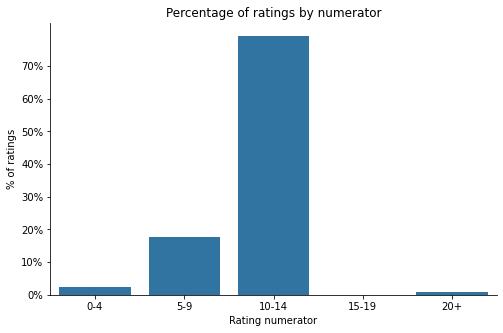

In [110]:
# plot a relative column chart
rel_col_chart(
    chart_data = dog_ratings['score_range'],
    title = 'Percentage of ratings by numerator',
    xlabel = 'Rating numerator',
    ylabel = '% of ratings'
)

**Observations:**
* Over 70% of ratings are positive, in the 10-14 range
* Very few ratings are over 15
* A significant proportion of ratings (~20%) are negative, i.e. less than 10

### Question: What are the most common dog names?

In [111]:
# count the names (excluding none) and filter for the 10 most frequent
dog_ratings.groupby('name')['dog_id'].count().drop('None').nlargest(10)

name
Charlie    11
Lucy       11
Cooper     10
Oliver     10
Penny       9
Tucker      9
Lola        8
Sadie       8
Winston     8
Daisy       7
Name: dog_id, dtype: int64

**Observations:**
* Charlie and Lucy are the joint most common name, followed by Cooper and Oliver

### Question: What dog breeds are the most common

In [112]:
# join the dog_rating and df_ip_clean datasets
# use inner join to filter out any rows where we don't have an image
df_merged = dog_ratings.merge(right=df_ip_clean, on='tweet_id', how='inner')

In [113]:
# confirm this worked 
df_merged.sample(5)

,dog_id,tweet_id,text,rating_numerator,rating_denominator,name,dog_type,score_range,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
948,1022,712097430750289920,I can't even comprehend how confused this dog must be right now. 10/10 https://t.co/8AGcQ4hIfK,10,10,None,None,10-14,https://pbs.twimg.com/media/CeHg1klW8AE4YOB.jpg,1,Labrador_retriever,0.720481,True,whippet,0.048032,True,Chesapeake_Bay_retriever,0.045046,True
1465,1589,676263575653122048,All this pupper wanted to do was go skiing. No one told him about the El Niño. Poor pupper. 10/10 maybe next year https://t.co/fTgbq1UBR9,10,10,None,pupper,10-14,https://pbs.twimg.com/media/CWKSIfUUYAAiOBO.jpg,1,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False
637,677,761227390836215808,This is Albert. He just found out that bees are dying globally at an alarming rate. 10/10 heckin worried af now https://t.co/nhLX27WsDY,10,10,Albert,None,10-14,https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg,1,cougar,0.306512,False,French_bulldog,0.280802,True,boxer,0.054523,True
1303,1417,683481228088049664,Meet Banjo. He's a Peppercorn Shoop Da Whoop. Nails look lethal. Skeptical of luminescent orb 11/10 stay woke pupper https://t.co/H7NZFumpKq,11,10,Banjo,pupper,10-14,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True
503,534,786233965241827333,This is Mattie. She's extremely dangerous. Will bite your h*ckin finger right off. Still 11/10 would pet with caution https://t.co/78c9W8kLFh,11,10,Mattie,None,10-14,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,1,Labrador_retriever,0.478193,True,schipperke,0.224817,True,Staffordshire_bullterrier,0.077396,True


In [114]:
# do a quick filter for photos which are identifiable as dogs only
df_merged = df_merged[df_merged['p1_dog']]

In [115]:
#confirm this worked
df_merged.sample(5)

,dog_id,tweet_id,text,rating_numerator,rating_denominator,name,dog_type,score_range,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1709,1835,670797304698376195,This is Trigger. He was minding his own business on stair when he overheard someone say they don't like bacon. 11/10 https://t.co/yqohZK4CL0,11,10,Trigger,None,10-14,https://pbs.twimg.com/media/CU8mlhoVAAAteS5.jpg,1,Pembroke,0.472197,True,beagle,0.090938,True,German_shepherd,0.064366,True
703,752,751251247299190784,This is Gilbert. He's being chased by a battalion of miniature floof cows. 10/10 we all believe in you Gilbert https://t.co/wayKZkDRTG,10,10,Gilbert,None,10-14,https://pbs.twimg.com/ext_tw_video_thumb/751250895690731520/pu/img/eziHbU1KbgZg-ijN.jpg,1,Walker_hound,0.178852,True,German_short-haired_pointer,0.115752,True,English_foxhound,0.113796,True
824,886,735635087207878657,This is Dakota. He hasn't grow into his skin yet. 11/10 would squeeze softly https://t.co/IvFSlNXpgj,11,10,Dakota,None,10-14,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False
1432,1554,677334615166730240,This dog gave up mid jump. 9/10 https://t.co/KmMv3Y2zI8,9,10,None,None,5-9,https://pbs.twimg.com/media/CWZgPPUWUAAUOvu.jpg,2,Lakeland_terrier,0.859392,True,Airedale,0.067292,True,Irish_water_spaniel,0.049531,True
544,582,778624900596654080,This is Penny. She's a sailor pup. 11/10 would take to the open seas with https://t.co/0rRxyBQt32,11,10,Penny,None,10-14,https://pbs.twimg.com/media/Cs47N3eWcAEmgiW.jpg,2,Airedale,0.786089,True,Irish_terrier,0.121488,True,Lakeland_terrier,0.014603,True


In [116]:
# get the 10 highest counts of breed
df_merged.groupby('p1')['tweet_id'].count().nlargest(10)

p1
golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: tweet_id, dtype: int64

In [117]:
# define function for plotting a (horizontal) bar chart with relative x axis
def rel_bar_chart(chart_data, xlabel=None, ylabel=None, title=None, plot_order=[]):
    base_color = sns.color_palette()[0]
    plt.figure(figsize=[8,5])

    # convert plot order to a list if needed
    if isinstance(plot_order, pd.Index):
        plot_order = list(plot_order.values)

#     if plot_order == []:
#         sns.countplot(y=chart_data, color=base_color, order=chart_data.value_counts().index.to_list());
#     else:
#         sns.countplot(y=chart_data, color=base_color, order=plot_order);

    if plot_order == []:
        plot_order = chart_data.value_counts().index.to_list()[:10]

    sns.countplot(y=chart_data, color=base_color, order=plot_order);



    # set up y axis which goes up to 100%
    x_ticks_max = chart_data.value_counts().max() / chart_data.count()
    if x_ticks_max > 0.5:
        x_tick_step = 0.1
    else:
        x_tick_step = 0.05
    x_tick_props = np.arange(0, x_ticks_max, x_tick_step) 
    x_tick_names = ['{:0.0f}%'.format(v * 100) for v in x_tick_props]

    # set x and y labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    ax = plt.gca()
    ax.set_xticks(x_tick_props * chart_data.count(), labels=x_tick_names)
    sns.despine();

    # Logic to print the proportion text on the bars
    counts = chart_data.value_counts()
#    if plot_order == []:
#        plot_order = chart_data.value_counts().index.to_list()

    for i in range(len(plot_order)):
        count = counts.loc[plot_order[i]]
        # Convert count into a percentage, and then into string
        pct_string = '{:0.1f}%'.format(100 * count / chart_data.count())
        # Print the string value on the bar. 
        plt.text(count + counts.max()*0.01, i, pct_string, va='center')

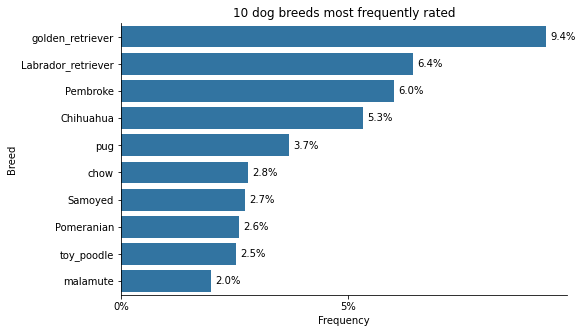

In [118]:
# plot this information as a relative bar chart (top 10 categories only)
rel_bar_chart(
    chart_data=df_merged['p1'],
    title='10 dog breeds most frequently rated',
    xlabel='Frequency',
    ylabel='Breed'
)

**Observations:**
* Golden and Labrador retrievers are the most popular categories

### Question: which breeds of dog get the higest rating?

In [119]:
# create a dataframe with the average breed scores and count of the number of ratings
df_breed_scores = pd.DataFrame({
    'ave_rating' : df_merged.groupby('p1')['rating_numerator'].mean(),
    'count_of_ratings': df_merged.groupby('p1')['tweet_id'].count()
}).sort_values('ave_rating', ascending=False)
df_breed_scores.index.names = ['dog_breed']

In [120]:
# confirm this worked
df_breed_scores.head()

,ave_rating,count_of_ratings
dog_breed,,
clumber,27.000000,1
soft-coated_wheaten_terrier,26.700000,10
West_Highland_white_terrier,15.642857,14
Great_Pyrenees,14.928571,14
borzoi,14.625000,8


In [121]:
# filter for dog's breeds with at least 5 ratings, and then get the top average ratings
df_breed_scores[df_breed_scores['count_of_ratings']>=5].head(10)

,ave_rating,count_of_ratings
dog_breed,,
soft-coated_wheaten_terrier,26.700000,10
West_Highland_white_terrier,15.642857,14
Great_Pyrenees,14.928571,14
borzoi,14.625000,8
Labrador_retriever,13.936170,94
Siberian_husky,13.250000,20
Pomeranian,12.868421,38
golden_retriever,12.277372,137
Border_terrier,12.142857,7


**Observations:**
* The soft-coated wheaten terrier get the highest average ratings, and 
* With an average score of 26.7, the soft-coated wheaten is far ahead of the 2nd most highly ranked category, at 15.6  